# Identifying safe loans with decision trees

In [292]:
import pandas as pd

In [293]:
types = {'grade' : str,
	     'sub_grade' : str,
	     'short_emp' : int,
	     'emp_length_num' : int,
	     'home_ownership' : str,
	     'dti':	float,
	     'purpose'	: str,
	     'term' :	str,
	     'last_delinq_none' :	int,
	     'last_major_derog_none' :	int,
	     'revol_util': 	float,
	     'total_rec_late_fee' :	float,
	     'safe_loans' :	int}

In [294]:
loans = pd.read_csv('lending-club-data.csv', dtype=types)

/tmp/ipykernel_977/952433.py:1: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('lending-club-data.csv', dtype=types)


In [295]:
loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.143500,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.393200,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.259550,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.275850,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.215330,20141201T000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122602,9856168,11708132,6000,6000,6000,60 months,23.40,170.53,E,E5,...,1.0,0.0,1.0,1.0,1,4.487630,20190101T000000,0,1,0
122603,9795013,11647121,15250,15250,15250,36 months,17.57,548.05,D,D2,...,0.4,0.0,0.0,1.0,0,10.117800,20170101T000000,0,0,0
122604,9695736,11547808,8525,8525,8525,60 months,18.25,217.65,D,D3,...,0.6,0.0,1.0,1.0,0,6.958120,20190101T000000,0,1,0
122605,9684700,11536848,22000,22000,22000,60 months,19.97,582.50,D,D5,...,1.0,1.0,0.0,1.0,0,8.961540,20190101T000000,1,0,1


In [296]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,grade_num,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,last_delinq_none,last_record_none,last_major_derog_none
count,1.226070e+05,1.226070e+05,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,1.226030e+05,122607.000000,122578.000000,...,122607.000000,122607.000000,122578.000000,122578.000000,122462.000000,122607.000000,122603.000000,122607.000000,122607.000000,122607.000000
mean,4.728452e+06,5.493222e+06,12809.733743,12736.123753,12497.828395,13.639487,396.623285,7.138502e+04,15.496888,0.211996,...,4.232882,0.597509,0.858107,0.908173,0.996734,0.123672,7.564725,0.588115,0.897795,0.873906
std,5.938517e+06,6.604693e+06,7932.313398,7887.167118,7946.731527,4.390836,239.475936,5.841483e+04,7.497442,0.662052,...,1.362138,0.278934,0.348942,0.288783,0.057059,0.329208,4.127291,0.492177,0.302918,0.331957
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.028895,0.000000,0.000000,0.000000
25%,8.532925e+05,1.064872e+06,6700.000000,6625.000000,6271.000000,10.620000,215.985000,4.405250e+04,9.880000,0.000000,...,3.000000,0.400000,1.000000,1.000000,1.000000,0.000000,4.362575,0.000000,1.000000,1.000000
50%,1.621401e+06,1.879659e+06,11000.000000,10950.000000,10500.000000,13.480000,348.180000,6.000000e+04,15.260000,0.000000,...,4.000000,0.600000,1.000000,1.000000,1.000000,0.000000,6.965760,1.000000,1.000000,1.000000
75%,6.699942e+06,8.117948e+06,17600.000000,17425.000000,17000.000000,16.290000,521.930000,8.500000e+04,20.850000,0.000000,...,5.000000,0.800000,1.000000,1.000000,1.000000,0.000000,10.215850,1.000000,1.000000,1.000000
max,3.784128e+07,4.060424e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.880000,29.000000,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.171000,1.000000,1.000000,1.000000


<Axes: xlabel='grade'>

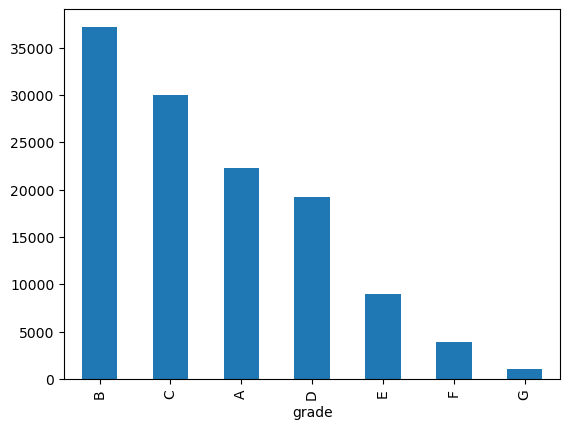

In [297]:
loans['grade'].value_counts().plot.bar()

<Axes: xlabel='home_ownership'>

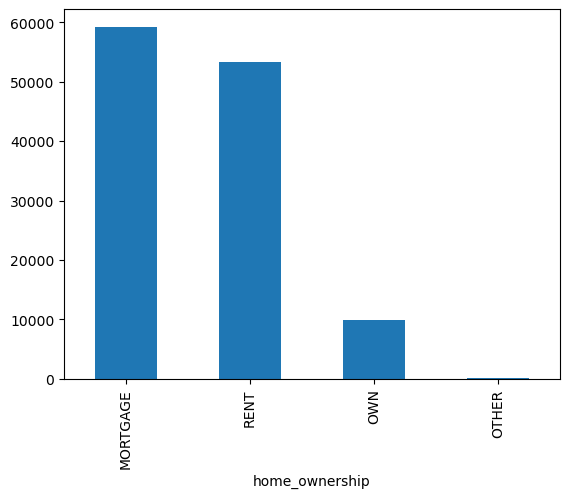

In [298]:
loans['home_ownership'].value_counts().plot.bar()

The target column (label column) of the dataset that we are interested in is called bad_loans. In this column 1 means a risky (bad) loan 0 means a safe loan.

In order to make this more intuitive and consistent with the lectures, we reassign the target to be:

+1 as a safe loan

-1 as a risky (bad) loan

In [299]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans', axis=1)

<Axes: xlabel='safe_loans'>

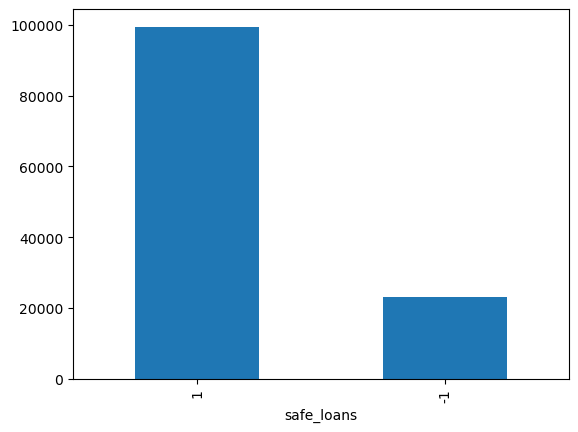

In [300]:
loans['safe_loans'].value_counts().plot.bar()

In [301]:
print(len(loans[loans['safe_loans']==1])/len(loans))
print(len(loans[loans['safe_loans']==-1])/len(loans))

0.8111853319957262
0.18881466800427382


## Features for the classification algorithm

In [302]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]

In [303]:
train_idx = pd.read_json('module-5-assignment-1-train-idx.json')
validation_idx = pd.read_json('module-5-assignment-1-validation-idx.json')
train_data = loans.iloc[train_idx[0].values]
validation_data = loans.iloc[validation_idx[0].values]

In [304]:
train_data

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,-1
6,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,-1
7,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,-1
10,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,-1
12,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122572,B,B1,1,1,MORTGAGE,8.94,debt_consolidation,36 months,0,1,41.4,0.0,1
122575,C,C2,0,6,MORTGAGE,13.58,debt_consolidation,36 months,0,1,76.0,0.0,1
122588,A,A5,0,4,OWN,7.57,debt_consolidation,36 months,1,1,34.4,0.0,1
122599,G,G2,0,11,MORTGAGE,26.27,medical,60 months,0,0,94.1,0.0,1


In [305]:
print(len(train_data))
print(len(validation_data))

37224
9284


In [306]:
validation_data['short_emp']

24        0
41        0
60        0
93        0
132       0
         ..
122390    0
122419    0
122445    1
122461    0
122480    1
Name: short_emp, Length: 9284, dtype: int64

# One-hot encoding

In [307]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder


In [308]:
# Identificar variables categóricas
categorical_variables = validation_data.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas identificadas: {categorical_variables}")


Variables categóricas identificadas: ['grade', 'sub_grade', 'home_ownership', 'purpose', 'term']


In [309]:
encoder = OneHotEncoder(sparse_output=False, drop=None)
valid_encoded_data = encoder.fit_transform(validation_data[categorical_variables])
train_encoded_data = encoder.fit_transform(train_data[categorical_variables])

In [310]:
valid_encoded_data

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [311]:
# Obtener los nombres de las nuevas columnas
feature_names = []
for i, feature in enumerate(categorical_variables):
    feature_vals = encoder.categories_[i]
    for val in feature_vals:
        feature_names.append(f"{feature}_{val}")

In [347]:

# Crear un DataFrame con las variables codificadas
train_encoded_df = pd.DataFrame(train_encoded_data, columns=feature_names)
valid_encoded_df = pd.DataFrame(valid_encoded_data, columns=feature_names)

# Eliminar las columnas categóricas originales y agregar las nuevas columnas codificadas
train_numeric_data = train_data.drop(columns=categorical_variables)
validation_numeric_data = validation_data.drop(columns=categorical_variables)

train_encoded_df.index=train_numeric_data.index
train_enc_data = pd.concat([train_numeric_data, train_encoded_df], axis=1, )
valid_encoded_df.index=validation_numeric_data.index
validation_enc_data = pd.concat([validation_numeric_data, valid_encoded_df], axis=1)

In [348]:
for column in train_enc_data.columns.tolist():
        if column==target:
                continue
        train_enc_data[column] = train_enc_data[column].fillna(0)
        validation_enc_data[column] = validation_enc_data[column].fillna(0)

In [349]:
train_encoded_data.shape

(37224, 60)

In [350]:
train_enc_data[target]

1        -1
6        -1
7        -1
10       -1
12       -1
         ..
122572    1
122575    1
122588    1
122599    1
122603    1
Name: safe_loans, Length: 37224, dtype: int64

In [365]:
decision_tree_model = tree.DecisionTreeClassifier(random_state=42, max_depth=6)
small_model = tree.DecisionTreeClassifier(max_depth=2,random_state=42)
decision_tree_model.fit(train_enc_data.drop(columns=target), train_enc_data[target])
small_model.fit(train_enc_data.drop(columns=target), train_enc_data[target])

DecisionTreeClassifier(max_depth=2, random_state=42)

In [366]:
validation_safe_loans = validation_enc_data[validation_enc_data[target] == 1]
validation_risky_loans = validation_enc_data[validation_enc_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = pd.concat([sample_validation_data_safe,sample_validation_data_risky], axis=0)
sample_validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
19,0,11,11.18,1,1,82.4,0.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79,0,10,16.85,1,1,96.4,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24,0,3,13.97,0,1,59.5,0.0,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
41,0,11,16.33,1,1,62.1,0.0,-1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [367]:
sample_validation_data[target]

19    1
79    1
24   -1
41   -1
Name: safe_loans, dtype: int64

In [368]:
decision_tree_model.predict(sample_validation_data.drop(columns=target))


array([ 1, -1, -1,  1])

In [369]:
predictions_small=small_model.predict(sample_validation_data.drop(columns=target))
predictions_small

array([ 1, -1, -1,  1])

In [370]:
decision_tree_model.predict_proba(sample_validation_data.drop(columns=target))

array([[0.34156543, 0.65843457],
       [0.53630646, 0.46369354],
       [0.64750958, 0.35249042],
       [0.20789474, 0.79210526]])

In [358]:
small_model.predict_proba(sample_validation_data.drop(columns=target))

array([[0.41896585, 0.58103415],
       [0.59255339, 0.40744661],
       [0.59255339, 0.40744661],
       [0.23120112, 0.76879888]])

In [371]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(sample_validation_data[target], predictions_small)
print(f"Precisión en el conjunto de validación: {accuracy:.4f}")
print("\nInforme de clasificación:")
print(classification_report(sample_validation_data[target], predictions_small))


Precisión en el conjunto de validación: 0.5000

Informe de clasificación:
              precision    recall  f1-score   support

          -1       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



In [377]:
train_prediction = decision_tree_model.predict(train_enc_data.drop(columns=target))
accuracy_score(train_enc_data[target], train_prediction)

0.6405276165914464

In [378]:
train_prediction = small_model.predict(train_enc_data.drop(columns=target))
accuracy_score(train_enc_data[target], train_prediction)

0.6135020416935311

In [376]:
validation_prediction = decision_tree_model.predict(validation_enc_data.drop(columns=target))
accuracy_score(validation_enc_data[target], validation_prediction)

0.6361482119775959

In [375]:
validation_prediction = small_model.predict(validation_enc_data.drop(columns=target))
accuracy_score(validation_enc_data[target], validation_prediction)

0.6193451098664369

In [379]:
big_model = tree.DecisionTreeClassifier(random_state=42, max_depth=10)

In [380]:
big_model.fit(train_enc_data.drop(columns=target), train_enc_data[target])

DecisionTreeClassifier(max_depth=10, random_state=42)

In [382]:
train_prediction = big_model.predict(train_enc_data.drop(columns=target))
accuracy_score(train_enc_data[target], train_prediction)

0.6637384483129164

In [381]:
validation_prediction = big_model.predict(validation_enc_data.drop(columns=target))
accuracy_score(validation_enc_data[target], validation_prediction)

0.6261309780267126

### Quantifying the cost of mistakes

Every mistake the model makes costs money. In this section, we will try and quantify the cost of each mistake made by the model.

Assume the following:

* **False negatives**: Loans that were actually safe but were predicted to be risky. This results in an oppurtunity cost of losing a loan that would have otherwise been accepted. 
* **False positives**: Loans that were actually risky but were predicted to be safe. These are much more expensive because it results in a risky loan being given. 
* **Correct predictions**: All correct predictions don't typically incur any cost.


Let's write code that can compute the cost of mistakes made by the model. Complete the following 4 steps:
1. First, let us compute the predictions made by the model.
1. Second, compute the number of false positives.
2. Third, compute the number of false negatives.
3. Finally, compute the cost of mistakes made by the model by adding up the costs of true positives and false positives.

First, let us make predictions on `validation_data` using the `decision_tree_model`:

In [383]:
predictions = decision_tree_model.predict(validation_enc_data.drop(columns=target))

In [384]:
FP = len(predictions[((predictions==1) & (validation_data[target]==-1))])
FP

1661

In [385]:
FN = len(predictions[((predictions==-1) & (validation_data[target]==1))])
FN

1717

In [386]:
COST_decision_tree_model = 10000*FN + 20000*FP
COST_decision_tree_model

50390000